In [1]:
import base64
import datetime
import json
import os
import random
import time

import scipy
from scipy import ndimage
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import statsmodels as sm
from pylab import rcParams
from pylab import *
from matplotlib.dates import date2num , DateFormatter
from PIL import Image

np.random.seed(1337)

%matplotlib inline
sns.set(font_scale=1.0)
rcParams['figure.figsize'] = 8, 6
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

pd.options.display.max_colwidth = 1000

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix

# Load the Data

In [2]:
d = pd.read_csv('tmp/train_ids.csv', index_col='id')

In [3]:
e = pd.read_csv('tmp/features_bathrooms.csv', index_col='id')
d = pd.merge(d, e, how='left', left_index=True, right_index=True)

In [4]:
e = pd.read_csv('tmp/features_bedrooms.csv', index_col='id')
d = pd.merge(d, e, how='left', left_index=True, right_index=True)

In [5]:
e = pd.read_csv('tmp/features_building_id.csv', index_col='id')
d = pd.merge(d, e, how='left', left_index=True, right_index=True)

In [6]:
e = pd.read_csv('tmp/features_created.csv', index_col='id')
d = pd.merge(d, e, how='left', left_index=True, right_index=True)

In [7]:
e = pd.read_csv('tmp/features_description.csv', index_col='id')
d = pd.merge(d, e, how='left', left_index=True, right_index=True)

In [8]:
e = pd.read_csv('tmp/features_display_address.csv', index_col='id')
d = pd.merge(d, e, how='left', left_index=True, right_index=True)

In [9]:
e = pd.read_csv('tmp/features_features.csv', index_col='id')
d = pd.merge(d, e, how='left', left_index=True, right_index=True)

In [10]:
e = pd.read_csv('tmp/features_latlon.csv', index_col='id')
d = pd.merge(d, e, how='left', left_index=True, right_index=True)

In [11]:
e = pd.read_csv('tmp/features_manager_id.csv', index_col='id')
d = pd.merge(d, e, how='left', left_index=True, right_index=True)

In [12]:
e = pd.read_csv('tmp/features_photos.csv', index_col='id')
d = pd.merge(d, e, how='left', left_index=True, right_index=True)

In [13]:
e = pd.read_csv('tmp/features_price.csv', index_col='id')
d = pd.merge(d, e, how='left', left_index=True, right_index=True)

In [14]:
e = pd.read_csv('tmp/features_street_address.csv', index_col='id')
d = pd.merge(d, e, how='left', left_index=True, right_index=True)

In [15]:
d = pd.get_dummies(data=d, columns=['cluster_id'])

In [16]:
labels = d.interest_level.copy()

In [17]:
for c in d.columns:
    if d.dtypes[c] == 'object':
        del d[c]

# Run Classification

In [23]:
param_grid = {
    'max_depth': [3, 9],
    'n_estimators': [10, 50],
    'objective': ['multi:softmax']
}
xgb = XGBClassifier()
m = GridSearchCV(
        estimator=xgb,
        param_grid=param_grid,
        cv=3)
m.fit(d, labels)
print m.best_score_
print m.best_params_

0.721936294375
{'n_estimators': 10, 'objective': 'multi:softmax', 'max_depth': 9}


In [24]:
param_grid = {
    'max_depth': [9, 15],
    'n_estimators': [10, 30],
    'objective': ['multi:softmax']
}
xgb = XGBClassifier()
m = GridSearchCV(
        estimator=xgb,
        param_grid=param_grid,
        cv=3)
m.fit(d, labels)
print m.best_score_
print m.best_params_

0.721936294375
{'n_estimators': 10, 'objective': 'multi:softmax', 'max_depth': 9}


In [25]:
xgb = XGBClassifier(
    max_depth=9,
    n_estimators=10,
    objective='multi:softmax')
xgb.fit(d, labels)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=9,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [27]:
fi = pd.DataFrame({'feature': d.columns, 'importance': xgb.feature_importances_})
fi = fi.sort_values(['importance'], ascending=False)

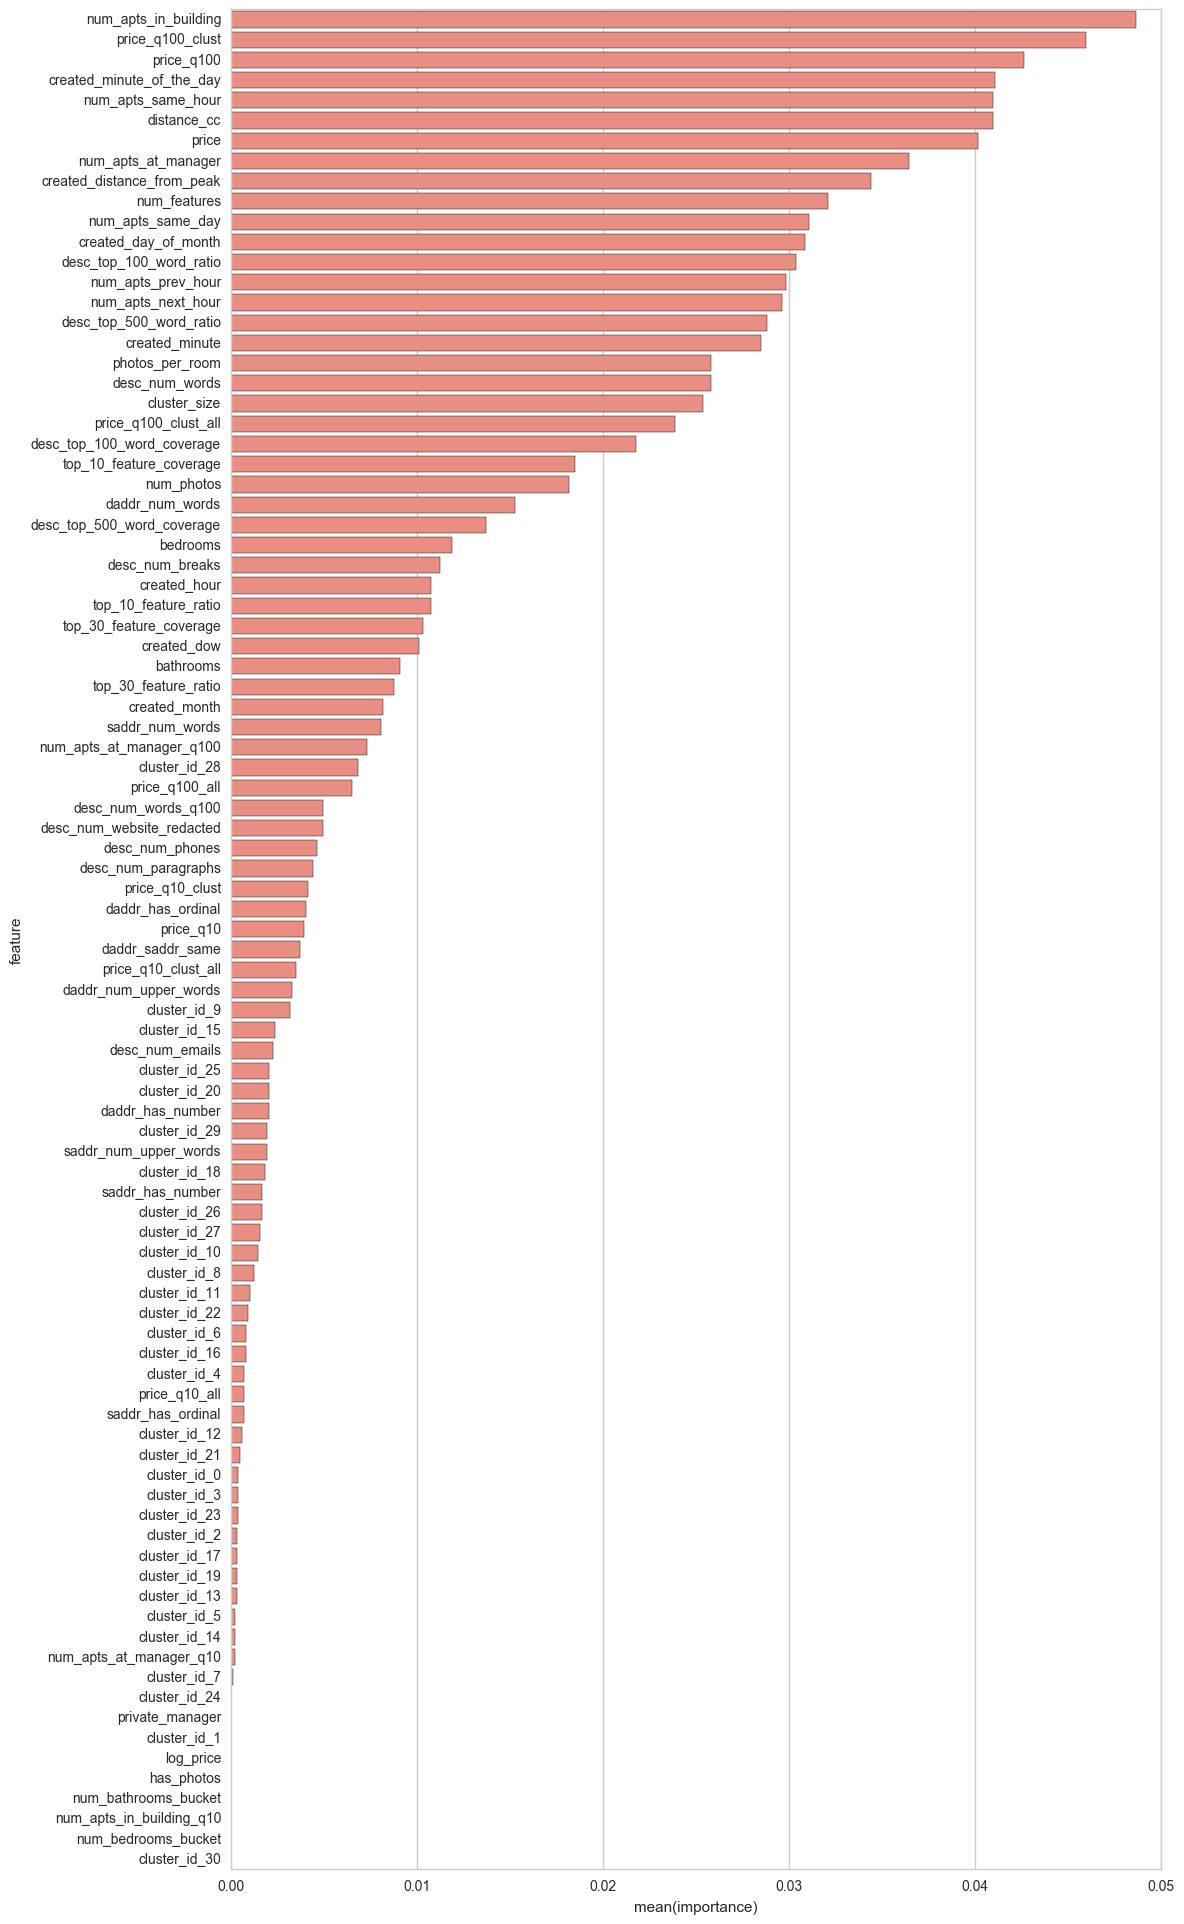

In [28]:
plt.figure(figsize=(12,24))
_ = sns.barplot(
        x='importance',
        y='feature',
        data=fi,
        color='salmon')